In [139]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense
from keras import regularizers
from keras import optimizers
import os

In [140]:
train_samples=pd.read_csv(r"c:\Users\HP\Downloads\house-prices-advanced-regression-techniques\train.csv")
train_samples


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [141]:
train_samples.info()
train_samples.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Dropped: ['Id','PoolQC','Alley','MiscFeature','Alley']

In [142]:
train_samples=train_samples.drop(['Id','PoolQC','Alley','MiscFeature','Alley'],axis=1)


In [143]:
def split_numeric_and_non_numeric_features(dataframe):
    df_numeric=pd.DataFrame()
    for i in dataframe.columns.values:
        if  pd.api.types.is_numeric_dtype(dataframe[i]):
            df_numeric[i]=dataframe[i]
    df_non_numeric=dataframe.drop(df_numeric.columns.values,axis=1)
    return (df_numeric,df_non_numeric)


numeric_data,non_numeric_data=split_numeric_and_non_numeric_features(train_samples)

numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [144]:
for feature in numeric_data:
    
    print(feature,"\t",len(set(train_samples[feature].values)),"\t\t",(train_samples[feature]).count())


MSSubClass 	 15 		 1460
LotFrontage 	 369 		 1201
LotArea 	 1073 		 1460
OverallQual 	 10 		 1460
OverallCond 	 9 		 1460
YearBuilt 	 112 		 1460
YearRemodAdd 	 61 		 1460
MasVnrArea 	 335 		 1452
BsmtFinSF1 	 637 		 1460
BsmtFinSF2 	 144 		 1460
BsmtUnfSF 	 780 		 1460
TotalBsmtSF 	 721 		 1460
1stFlrSF 	 753 		 1460
2ndFlrSF 	 417 		 1460
LowQualFinSF 	 24 		 1460
GrLivArea 	 861 		 1460
BsmtFullBath 	 4 		 1460
BsmtHalfBath 	 3 		 1460
FullBath 	 4 		 1460
HalfBath 	 3 		 1460
BedroomAbvGr 	 8 		 1460
KitchenAbvGr 	 4 		 1460
TotRmsAbvGrd 	 12 		 1460
Fireplaces 	 4 		 1460
GarageYrBlt 	 178 		 1379
GarageCars 	 5 		 1460
GarageArea 	 441 		 1460
WoodDeckSF 	 274 		 1460
OpenPorchSF 	 202 		 1460
EnclosedPorch 	 120 		 1460
3SsnPorch 	 20 		 1460
ScreenPorch 	 76 		 1460
PoolArea 	 8 		 1460
MiscVal 	 21 		 1460
MoSold 	 12 		 1460
YrSold 	 5 		 1460
SalePrice 	 663 		 1460


In [145]:
for feature in numeric_data.columns:
    numeric_data[feature]=numeric_data[feature].fillna(numeric_data[feature].mean())

In [146]:
Scaler=StandardScaler()
numeric_data_tensor=Scaler.fit_transform(numeric_data.drop('SalePrice',axis=1))
numeric_data_tensor
scaled_numeric_data=pd.DataFrame(data=numeric_data_tensor,columns=numeric_data.iloc(axis=1)[:-1].columns.values)
scaled_numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [147]:
x_train_numeric,x_test_numeric,y_train_numeric,y_test_numeric=train_test_split(numeric_data_tensor,train_samples['SalePrice'],test_size=0.15,random_state=42)
x_train_numeric,x_val_numeric,y_train_numeric,y_val_numeric=train_test_split(x_train_numeric,y_train_numeric,test_size=0.15,random_state=42)
x_train_numeric.shape

(1054, 36)

In [148]:
numeric_model=tf.keras.Sequential()
numeric_model.add(Dense(64,activation='relu'))
numeric_model.add(Dense(64,activation='relu'))
numeric_model.add(Dense(1))
numeric_model.compile(loss='mse',optimizer=optimizers.Adam(learning_rate=0.0001))

In [149]:
#history=numeric_model.fit(x_train_numeric,y_train_numeric,epochs=300,batch_size=64,validation_data=(x_val_numeric,y_val_numeric))

In [150]:
#history_dict=history.history
#plt.plot(range(1,301),history_dict['val_loss'])
#plt.show()

In [151]:
y_test_numeric.shape
#numeric_model.predict(x_test_numeric).shape


(219,)

In [152]:
numeric_predictions=pd.DataFrame()

numeric_predictions['Actual']=y_test_numeric
numeric_predictions['Predictions']=numeric_model.predict(x_test_numeric)

numeric_predictions

7/7 [==============================] - 0s 2ms/step


,Actual,Predictions
892,154500,-0.544786
1105,325000,-0.185459
413,115000,-0.137604
522,159000,-0.050259
1036,315500,-0.560978
...,...,...
271,241500,-0.164341
240,262500,-0.872057
597,194201,-0.721309
946,143000,-0.247267


In [153]:
for feature in non_numeric_data:
    
    print(feature,"\t",len(set(train_samples[feature].values)),"\t\t",(train_samples[feature]).count())


MSZoning 	 5 		 1460
Street 	 2 		 1460
LotShape 	 4 		 1460
LandContour 	 4 		 1460
Utilities 	 2 		 1460
LotConfig 	 5 		 1460
LandSlope 	 3 		 1460
Neighborhood 	 25 		 1460
Condition1 	 9 		 1460
Condition2 	 8 		 1460
BldgType 	 5 		 1460
HouseStyle 	 8 		 1460
RoofStyle 	 6 		 1460
RoofMatl 	 8 		 1460
Exterior1st 	 15 		 1460
Exterior2nd 	 16 		 1460
MasVnrType 	 5 		 1452
ExterQual 	 4 		 1460
ExterCond 	 5 		 1460
Foundation 	 6 		 1460
BsmtQual 	 5 		 1423
BsmtCond 	 5 		 1423
BsmtExposure 	 5 		 1422
BsmtFinType1 	 7 		 1423
BsmtFinType2 	 7 		 1422
Heating 	 6 		 1460
HeatingQC 	 5 		 1460
CentralAir 	 2 		 1460
Electrical 	 6 		 1459
KitchenQual 	 4 		 1460
Functional 	 7 		 1460
FireplaceQu 	 6 		 770
GarageType 	 7 		 1379
GarageFinish 	 4 		 1379
GarageQual 	 6 		 1379
GarageCond 	 6 		 1379
PavedDrive 	 3 		 1460
Fence 	 5 		 281
SaleType 	 9 		 1460
SaleCondition 	 6 		 1460


In [154]:
non_numeric_data_with_dummy=non_numeric_data.copy()
for feature in non_numeric_data_with_dummy.columns:
    non_numeric_data_with_dummy[feature]=non_numeric_data_with_dummy[feature].fillna(feature+'None')
    dummy_features=pd.get_dummies(non_numeric_data_with_dummy[feature])
    dummy_features.columns=[feature+str(i) for i in dummy_features.columns.values]
    non_numeric_data_with_dummy=non_numeric_data_with_dummy.drop(feature,axis=1)
    non_numeric_data_with_dummy=pd.concat([non_numeric_data_with_dummy,dummy_features],axis=1)

In [155]:
non_numeric_data_with_dummy

,MSZoningC (all),MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetGrvl,StreetPave,LotShapeIR1,LotShapeIR2,LotShapeIR3,...,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAbnorml,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [156]:
scaled_numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [157]:
#combined_train_data=pd.concat([non_numeric_data_with_dummy,scaled_numeric_data],axis=1)

In [158]:
#combined_train_data

INITIAL MODEL (commented out after building improved model)

In [159]:
#x_train,x_test,y_train,y_test=train_test_split(combined_train_data,train_samples['SalePrice'],test_size=0.15,random_state=42)
#x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.15,random_state=42)
#x_train

In [160]:
#from keras import layers
#model=tf.keras.Sequential()
#model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Drop(0.5))
#model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(1))
#model.compile(loss='mse',optimizer=optimizers.Adam())

In [161]:
#history=model.fit(x_train,y_train,batch_size=64,epochs=30,validation_data=(x_val,y_val))


In [162]:
#history_dict=history.history
#print(history_dict['val_loss'])
#plt.plot(range(1,31),history_dict['val_loss'])
#plt.plot(range(1,31),history_dict['loss'])
#plt.show()

In [163]:
#predictions=pd.DataFrame()

#predictions['Actual']=y_test
#predictions['Predictions']=model.predict(x_test)

#predictions

In [164]:
#error=error=np.log(predictions['Actual'])-np.log(predictions['Predictions'])
#error**=2
#error.sum()**0.5/len(error)

In [165]:

#model.save(os.path.join(r"C:\Users\HP\Desktop",r"house_price_prediction_model.h5"))

In [166]:
test_data=pd.read_csv(r"C:\Users\HP\Downloads\house-prices-advanced-regression-techniques\test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [167]:
test_data=test_data.drop(['Id','PoolQC','Alley','MiscFeature','Alley'],axis=1)

In [168]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [169]:
test_numeric,test_non_numeric=split_numeric_and_non_numeric_features(test_data)


In [170]:
for feature in test_numeric.columns.values:
    test_numeric[feature]=test_numeric[feature].fillna(test_numeric[feature].mean())
test_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [171]:
test_numeric_tensor=Scaler.transform(test_numeric)
scaled_test_numeric=pd.DataFrame(data=test_numeric_tensor,columns=test_numeric.columns.values)


In [172]:

scaled_test_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.872563,0.451936,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.574410,0.053428,0.604293,...,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.645210
1,-0.872563,0.497357,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.023903,1.051363,-0.288653,...,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.645210
2,0.073375,0.179413,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.574410,0.761852,-0.288653,...,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.645210
3,0.073375,0.361095,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.463612,0.347326,-0.288653,...,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.645210
4,1.492282,-1.228623,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.574410,-0.396190,-0.288653,...,0.154492,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688,-1.969111,1.645210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,-2.227875,-0.859988,-1.518467,1.280685,-0.041991,-0.720298,-0.574410,-0.973018,-0.288653,...,-2.212963,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,-1.367655
1455,2.438219,-2.227875,-0.864197,-1.518467,-0.517200,-0.041991,-0.720298,-0.574410,-0.420316,-0.288653,...,-0.874836,-0.752176,-0.342128,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,-1.367655
1456,-0.872563,4.085578,0.950423,-0.795151,1.280685,-0.373198,0.539493,-0.574410,1.711535,-0.288653,...,0.482006,3.030870,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-1.367655
1457,0.664586,-0.365633,-0.007600,-0.795151,-0.517200,0.686666,0.345679,-0.574410,-0.233889,-0.288653,...,-2.212963,-0.113687,-0.221343,-0.359325,-0.116339,-0.270208,-0.068692,1.323736,0.250891,-1.367655


In [173]:
#test_non_numeric_data_with_dummy=test_non_numeric.copy()
#for feature in test_non_numeric_data_with_dummy.columns:
  #  test_non_numeric_data_with_dummy[feature]=test_non_numeric_data_with_dummy[feature].fillna(feature+'None')
   # test_dummy_features=pd.get_dummies(test_non_numeric_data_with_dummy[feature])
    #test_dummy_features.columns=[feature+str(i) for i in test_dummy_features.columns.values]
   # test_non_numeric_data_with_dummy=test_non_numeric_data_with_dummy.drop(feature,axis=1)
   # test_non_numeric_data_with_dummy=pd.concat([test_non_numeric_data_with_dummy,test_dummy_features],axis=1)

In [174]:
#test_non_numeric_data_with_dummy
#not_in_train_data=([i for i in test_non_numeric_data_with_dummy.columns if i not in non_numeric_data_with_dummy.columns])
#not_in_test_data=[i for i in non_numeric_data_with_dummy.columns if i not in test_non_numeric_data_with_dummy]
##   test_non_numeric_data_with_dummy=test_non_numeric_data_with_dummy.drop(feature,axis=1)
#for feature in not_in_test_data:
 #   test_non_numeric_data_with_dummy[feature]=np.zeros((1459,1))



In [175]:
#test_non_numeric_data_with_dummy

In [176]:
#test_non_numeric_data_with_dummy=test_non_numeric_data_with_dummy[non_numeric_data_with_dummy.columns.values]
#test_non_numeric_data_with_dummy

In [177]:
#combined_test_data=pd.concat([test_non_numeric_data_with_dummy,scaled_test_numeric],axis=1)

In [178]:
#test_predicted=model.predict(combined_test_data)
#test_prediction=pd.DataFrame()
#test_prediction['Id']=range(1461,2920)
#test_prediction['SalePrice']=test_predicted
#test_prediction

In [179]:
#test_prediction.to_csv(os.path.join(r"C:\Users\HP\Downloads\house-prices-advanced-regression-techniques",r"submission_25_07_2024.csv"))

UPDATED MODEL

Remove the dummy columns which are not common in test_non_numeric_data_with_dummy and non_numeric_data_with_dummy

In [180]:
test_non_numeric_data_with_dummy=test_non_numeric.copy()
for feature in test_non_numeric_data_with_dummy.columns:
    test_non_numeric_data_with_dummy[feature]=test_non_numeric_data_with_dummy[feature].fillna(feature+'None')
    test_dummy_features=pd.get_dummies(test_non_numeric_data_with_dummy[feature])
    test_dummy_features.columns=[feature+str(i) for i in test_dummy_features.columns.values]
    test_non_numeric_data_with_dummy=test_non_numeric_data_with_dummy.drop(feature,axis=1)
    test_non_numeric_data_with_dummy=pd.concat([test_non_numeric_data_with_dummy,test_dummy_features],axis=1)

In [181]:
not_in_train_data=([i for i in test_non_numeric_data_with_dummy.columns if i not in non_numeric_data_with_dummy.columns])
not_in_test_data=[i for i in non_numeric_data_with_dummy.columns if i not in test_non_numeric_data_with_dummy.columns]
for feature in not_in_train_data:
    test_non_numeric_data_with_dummy=test_non_numeric_data_with_dummy.drop(feature,axis=1)
for feature in not_in_test_data:
    non_numeric_data_with_dummy=non_numeric_data_with_dummy.drop(feature,axis=1)
    

In [182]:
test_non_numeric_data_with_dummy=test_non_numeric_data_with_dummy[non_numeric_data_with_dummy.columns.values]
test_non_numeric_data_with_dummy

,MSZoningC (all),MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetGrvl,StreetPave,LotShapeIR1,LotShapeIR2,LotShapeIR3,...,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAbnorml,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


training new model

In [183]:
combined_train_data=pd.concat([non_numeric_data_with_dummy,scaled_numeric_data],axis=1)

In [184]:
x_train,x_test,y_train,y_test=train_test_split(combined_train_data,train_samples['SalePrice'],test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.15,random_state=42)
x_train

,MSZoningC (all),MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetGrvl,StreetPave,LotShapeIR1,LotShapeIR2,LotShapeIR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
664,0,0,0,1,0,0,1,0,1,0,...,3.092757,0.780197,3.326720,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,-1.367655
971,0,0,0,1,0,0,1,0,0,0,...,0.004772,-0.752176,-0.296834,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,0.891994
1364,0,1,0,0,0,0,1,0,0,0,...,0.032844,-0.752176,1.801808,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,-1.367655
1166,0,0,0,1,0,0,1,1,0,0,...,1.417759,0.524802,-0.206245,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
991,0,0,0,0,1,0,1,0,0,0,...,-0.229167,-0.752176,1.847102,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.730892,0.891994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0,0,0,1,0,0,1,0,0,0,...,0.332285,0.780197,-0.357226,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-1.367655
1351,0,0,0,1,0,0,1,1,0,0,...,0.079632,-0.752176,0.563760,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-1.229111,0.138777
40,0,0,0,1,0,0,1,0,0,0,...,-0.154306,-0.752176,1.379060,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-1.367655
116,0,0,0,1,0,0,1,0,0,0,...,-0.865479,-0.752176,-0.402520,1.997536,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.891994


In [196]:
new_model=tf.keras.Sequential()
new_model.add(Dense(300,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
new_model.add(Dense(300,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
new_model.add(Dense(300,activation='elu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
new_model.add(Dense(300,activation='elu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
new_model.add(Dense(300,activation='elu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
new_model.add(Dense(300,activation='elu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
new_model.add(Dense(1))
new_model.compile(loss='mse',optimizer=optimizers.Adam(learning_rate=0.0005))


In [197]:
history=new_model.fit(x_train,y_train,batch_size=64,epochs=40,validation_data=(x_val,y_val))#callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/40
17/17 [==============================] - 8s 46ms/step - loss: 37984632832.0000 - val_loss: 42968158208.0000
Epoch 2/40
17/17 [==============================] - 0s 19ms/step - loss: 37780672512.0000 - val_loss: 42313060352.0000
Epoch 3/40
17/17 [==============================] - 0s 20ms/step - loss: 35860099072.0000 - val_loss: 37497720832.0000
Epoch 4/40
17/17 [==============================] - 0s 17ms/step - loss: 26408900608.0000 - val_loss: 19873222656.0000
Epoch 5/40
17/17 [==============================] - 0s 15ms/step - loss: 8804281344.0000 - val_loss: 8161573888.0000
Epoch 6/40
17/17 [==============================] - 0s 15ms/step - loss: 6322749440.0000 - val_loss: 7874233344.0000
Epoch 7/40
17/17 [==============================] - 0s 14ms/step - loss: 5794104320.0000 - val_loss: 7538772992.0000
Epoch 8/40
17/17 [==============================] - 0s 15ms/step - loss: 5581221888.0000 - val_loss: 7091621376.0000
Epoch 9/40
17/17 [==============================] - 0s 1

In [198]:
history_dict=history.history
epochs=range(1,len(history_dict['loss'])+1)

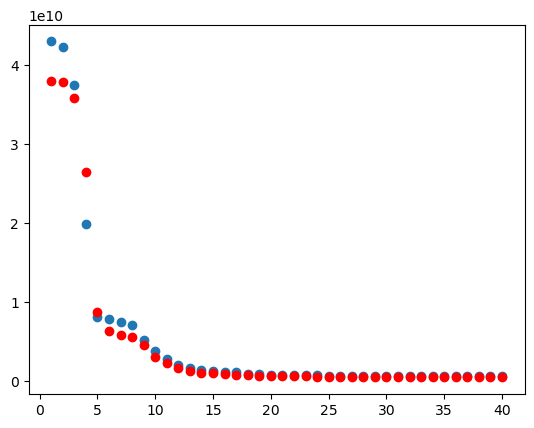

[2824845824.0,
 2036408320.0,
 1668457600.0,
 1426956288.0,
 1267259776.0,
 1163915392.0,
 1116744448.0,
 956270400.0,
 901325952.0,
 852430144.0,
 812458880.0,
 839684288.0,
 766312128.0,
 744897152.0,
 724405248.0,
 725300160.0,
 707881920.0,
 692791552.0,
 687483520.0,
 692765760.0,
 663311552.0,
 650539520.0,
 661803456.0,
 665332096.0,
 677113600.0,
 700916736.0,
 659509696.0,
 651863936.0,
 638540736.0,
 659065920.0]

In [199]:
plt.plot(epochs[-50:],history_dict['val_loss'][-50:],'o')
plt.plot(epochs[-50:],history_dict['loss'][-50:],'ro')
plt.show()
history_dict['val_loss'][-30:]

In [200]:
predictions=pd.DataFrame()

predictions['Actual']=y_test
predictions['Predictions']=new_model.predict(x_test)

predictions.head(10)

7/7 [==============================] - 0s 5ms/step


,Actual,Predictions
892,154500,153274.078125
1105,325000,340335.312500
413,115000,102820.476562
522,159000,160040.703125
1036,315500,331929.218750
614,75500,83514.226562
218,311500,229124.000000
1160,146000,144941.812500
649,84500,79777.148438
887,135500,147195.562500


Metric=> Mean Squared Errors (MSE) between log of actual and log of predicted values

In [190]:
error=error=np.log(predictions['Actual'])-np.log(predictions['Predictions'])
error**=2
error.sum()**0.5/len(error)

0.009257554286432578

In [191]:
combined_test_data=pd.concat([test_non_numeric_data_with_dummy,scaled_test_numeric],axis=1)
combined_test_data

,MSZoningC (all),MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetGrvl,StreetPave,LotShapeIR1,LotShapeIR2,LotShapeIR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,0,0,1,0,0,0,...,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.645210
1,0,0,0,1,0,0,1,1,0,0,...,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.645210
2,0,0,0,1,0,0,1,1,0,0,...,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.645210
3,0,0,0,1,0,0,1,1,0,0,...,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.645210
4,0,0,0,1,0,0,1,1,0,0,...,0.154492,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688,-1.969111,1.645210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,-2.212963,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,-1.367655
1455,0,0,0,0,1,0,1,0,0,0,...,-0.874836,-0.752176,-0.342128,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,-1.367655
1456,0,0,0,1,0,0,1,0,0,0,...,0.482006,3.030870,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-1.367655
1457,0,0,0,1,0,0,1,0,0,0,...,-2.212963,-0.113687,-0.221343,-0.359325,-0.116339,-0.270208,-0.068692,1.323736,0.250891,-1.367655


In [192]:
test_predicted=new_model.predict(combined_test_data)
test_prediction=pd.DataFrame()
test_prediction['Id']=range(1461,2920)
test_prediction['SalePrice']=test_predicted
test_prediction.head(20)

46/46 [==============================] - 0s 5ms/step


,Id,SalePrice
0,1461,126218.328125
1,1462,159717.421875
2,1463,181433.000000
3,1464,193974.859375
4,1465,197848.875000
5,1466,175838.718750
6,1467,178998.343750
7,1468,168265.578125
8,1469,193213.140625
9,1470,129775.273438


In [193]:
test_prediction.to_csv(os.path.join(r"C:\Users\HP\Downloads\house-prices-advanced-regression-techniques",r"submission_25_07_2024.csv"))